# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/floraham/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

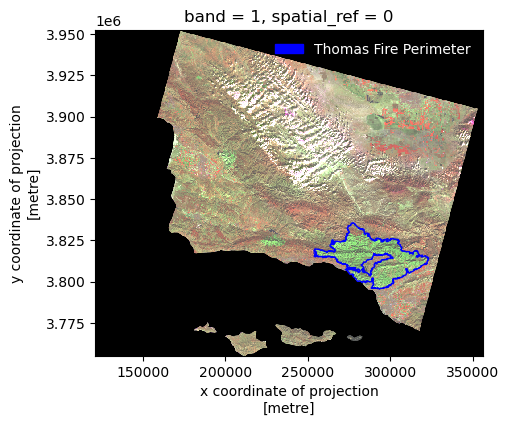

In [34]:
### ===== FINAL CODE =====

# importing the possible libraries 
import os
import numpy as np 
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # for creating legends 
import shapely
import xarray as xr 
import rioxarray as rioxr 
import geopandas as gpd 
from shapely.geometry import Polygon
from rasterio.features import rasterize #for rasterizing polygons 

# Open the NetCDF file using regular open_rasterio() method
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data', 'landsat8-2018-01-26-sb-simplified.nc'))

#open ca_fire file 
ca_fire = gpd.read_file('~/eds220-hwk-4/data/California_Fire_Perimeters')

# drop extra dimensions 
landsat = landsat.squeeze() 

## reproject ca_fire crs to landsat crs
ca_fire = ca_fire.to_crs(landsat.rio.crs)

# creating the false color image and plotting it to see results 
fc = landsat[['nir08', 'swir22', 'red']]

#the column titles are capitalized and some titles have strange syntax. 
#Converting to lower and doing minor cleanup. 
ca_fire.columns = ca_fire.columns.str.lower()
ca_fire.rename(columns={'year_': 'year'}, inplace=True)
ca_fire.set_index('index').reset_index() #setting the index column to "index" in case it needs to be preserved, and resetting the default index column. 

#select the row with fire_name of THOMAS, because we want the Thomas fire. 
thomas_shp = ca_fire[ca_fire['fire_name'] == 'THOMAS']

##--------------PLOT---------------##

fig, ax = plt.subplots(figsize = (5,5)) #setting up the figure & axis 

fc.to_array().plot.imshow(robust = True, ax=ax) #plotting the false color imagery, and making sure it's on the same plot as the other plots 
thomas_shp.plot(ax = ax, color="none",  edgecolor="blue")

# use mpatches.Patch to update labels & legend
thomas_fire_border_patch = mpatches.Patch(color='blue', # change color to blue
                          label='Thomas Fire Perimeter') # update label
## add a legend 
ax.legend(handles = [thomas_fire_border_patch], 
          frameon=False, # don't inlcude legend frame 
          loc = "upper right", # adjusting location of legend 
          labelcolor = "white") # adjust text visibility

# displaying plot
plt.show()

## Import libraries and functions

In [2]:
# importing the possible libraries 
import os
import numpy as np 
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # for creating legends 
import shapely
import xarray as xr 
import rioxarray as rioxr 
import geopandas as gpd 
from shapely.geometry import Polygon
from rasterio.features import rasterize #for rasterizing polygons 

## Import data

In [32]:
# Open the NetCDF file using regular open_rasterio() method
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data', 'landsat8-2018-01-26-sb-simplified.nc'))


#open ca_fire file 
ca_fire = gpd.read_file('~/eds220-hwk-4/data/California_Fire_Perimeters')


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [4]:
#xploring the datasets

#checking out the dataset structure
ca_fire.head(5)

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


In [33]:
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [5]:
#see if crs's are the same 

print(landsat.rio.crs == ca_fire.crs)

##no they are not the same. We'll have to convert them to the same CRS later. 

False


<AxesSubplot:>

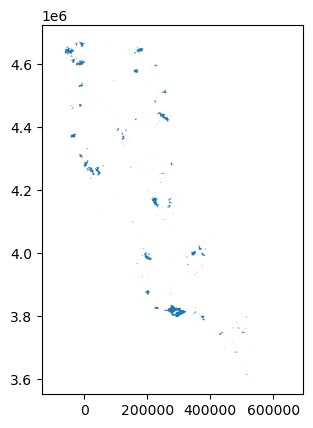

In [16]:
##check to see what the shapefile looks like. 

ca_fire.plot()

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [22]:
# drop the dimensions 
landsat = landsat.squeeze() 

#check what landsat looks like 
landsat

## reproject ca_fire crs to landsat crs
ca_fire = ca_fire.to_crs(landsat.rio.crs)

print('CRS match:',  ca_fire.crs == landsat.rio.crs)

CRS match: True


## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


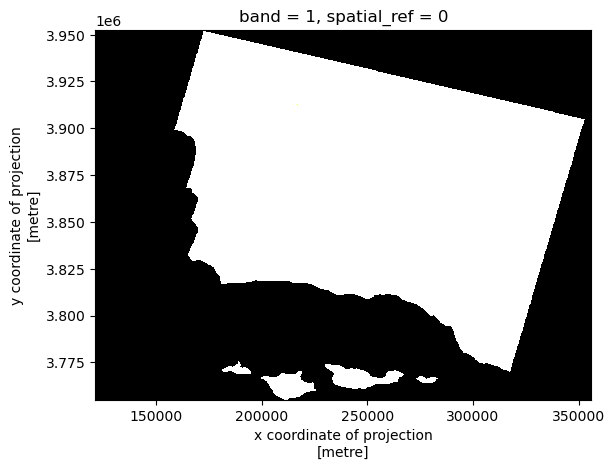

In [9]:
#select the red green and blue bands in that order

landsat[['red', 'green', 'blue']].to_array().plot.imshow()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

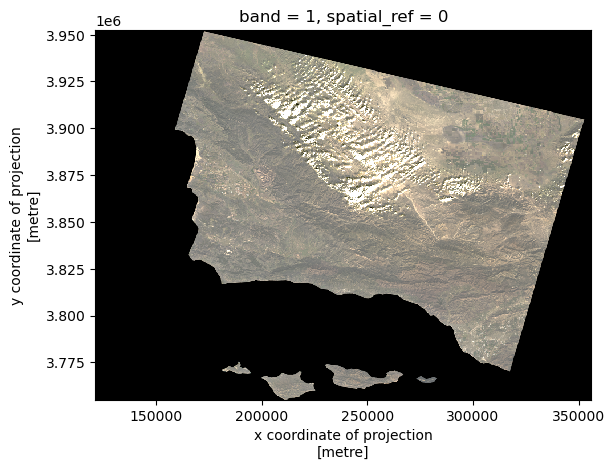

In [30]:
# your code here robust (bool, optional) – If True and vmin or vmax are absent, the colormap range is computed with 2nd and 98th percentiles instead of the extreme values.
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

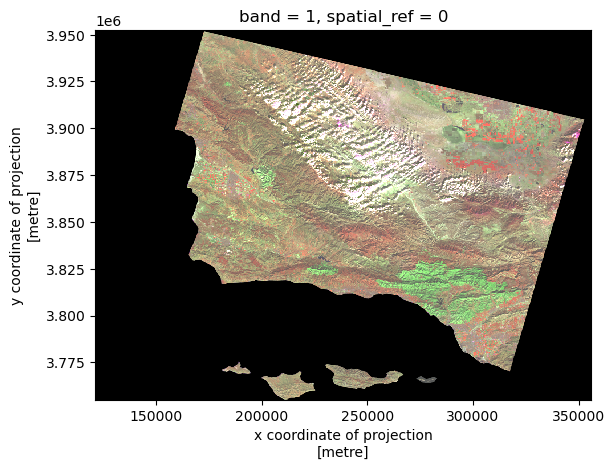

In [25]:
# creating the false color image and plotting it to see results 
fc = landsat[['nir08', 'swir22', 'red']]

#show 
fc.to_array().plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [37]:
#the column titles are capitalized and some titles have strange syntax. 

#Converting to lower and doing minor cleanup. 
ca_fire.columns = ca_fire.columns.str.lower()
ca_fire.rename(columns={'year_': 'year'}, inplace=True)

#setting the index column to "index" in case it needs to be preserved, and resetting the default index column. 
ca_fire.set_index('index').reset_index().head(4)

,index,objectid,year,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,...,gis_acres,comments,complex_na,complex_in,irwinid,fire_num,decades,shape_leng,shape_area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((329836.442 3778607.342, 329858.049 3..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((283091.321 3802354.285, 283072.171 3..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((317706.428 3786632.044, 317720.407 3..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((330068.430 3778089.747, 330078.179 3..."


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

In [26]:
#select the row with fire_name of THOMAS, because we want the Thomas fire. 
thomas_shp = ca_fire[ca_fire['fire_name'] == 'THOMAS']

In [27]:
##check out what it looks like##
thomas_shp

,index,objectid,year,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,...,gis_acres,comments,complex_na,complex_in,irwinid,fire_num,decades,shape_leng,shape_area,geometry
436,20274,41874,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,...,281790.875,CONT_DATE based on Inciweb,None,None,None,None,2010,540531.887458,1.681106e+09,"MULTIPOLYGON (((259241.263 3814482.913, 259193..."


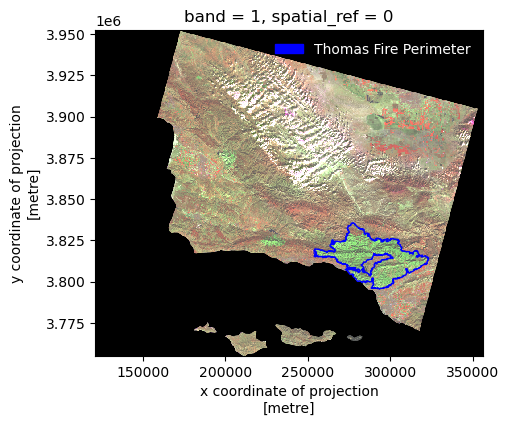

In [29]:
##--------------PLOT---------------##

fig, ax = plt.subplots(figsize = (5,5)) #setting up the figure & axis 

fc.to_array().plot.imshow(robust = True, ax=ax) #plotting the false color imagery, and making sure it's on the same plot as the other plots 
thomas_shp.plot(ax = ax, color="none",  edgecolor="blue")

# use mpatches.Patch to update labels & legend
thomas_fire_border_patch = mpatches.Patch(color='blue', # change color to blue
                          label='Thomas Fire Perimeter') # update label
## add a legend 
ax.legend(handles = [thomas_fire_border_patch], 
          frameon=False, # don't inlcude legend frame 
          loc = "upper right", # adjusting location of legend 
          labelcolor = "white") # adjust text visibility

# displaying plot
plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.